<b>AI 511 Machine Learning<br/>
International Institute of Information Technology, Bangalore.<br/>
Project Title: Home Loan Default Risk Prediction</b></br><br/><br/>
Team: Phoenix<br/>
contributors: <br/>1. Soham Deepak Pawar<br/>
              2. Boppana Venkatesh<br/>

In [389]:
#Import all required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
from sklearn import preprocessing
import seaborn as sn
from sklearn import metrics
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek 
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [390]:
train_data=pd.read_csv('train_data.csv')
test_data=pd.read_csv('test_data.csv')

In [391]:
###submission####
prediction_df=pd.DataFrame(data=test_data,columns=['SK_ID_CURR'])

In [392]:
train_data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
count,184506.000000,184506.000000,1.845060e+05,1.845060e+05,184500.000000,1.843390e+05,184506.000000,184506.000000,184506.000000,184506.00000,184506.000000,62873.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184505.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,80432.000000,184093.000000,147850.000000,90931.000000,76531.000000,94606.000000,61749.000000,55535.000000,86186.000000,91699.000000,92780.000000,59262.000000,74963.000000,58294.000000,91972.000000,56360.000000,82718.000000,90931.000000,76531.000000,94606.000000,61749.000000,55535.000000,86186.000000,91699.000000,92780.000000,59262.000000,74963.000000,58294.000000,91972.00000,56360.000000,82718.000000,90931.000000,76531.000000,94606.000000,61749.000000,55535.000000,86186.000000,91699.000000,92780.000000,59262.000000,74963.000000,58294.000000,91972.000000,56360.000000,82718.000000,95558.000000,183867.000000,183867.000000,183867.000000,183867.000000,184505.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.0,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,159508.000000,159508.000000,159508.000000,159508.000000,159508.000000,159508.000000,184506.000000
mean,278031.658488,0.416463,1.689985e+05,5.992854e+05,27114.455805,5.386926e+05,0.020868,-16036.718307,63838.583271,-4984.89506,-2994.113948,12.049115,0.999995,0.819849,0.199115,0.998043,0.281611,0.056638,2.152706,2.051787,2.031332,12.062963,0.015176,0.051299,0.041175,0.078778,0.230323,0.179257,0.502568,0.514616,0.510894,0.117193,0.088303,0.977795,0.752196,0.044500,0.078558,0.149578,0.225968,0.231827,0.066468,0.100229,0.107146,0.008890,0.028265,0.113888,0.087360,0.977083,0.759342,0.042394,0.074057,0.144987,0.221899,0.227819,0.065124,0.104988,0.10566,0.008094,0.026867,0.117568,0.087798,0.977831,0.755489,0.044459,0.077690,0.149065,0.225543,0

In [393]:
test_data.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,123005.000000,123005.000000,1.230050e+05,1.230050e+05,122999.000000,1.228940e+05,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,41709.000000,123005.0,123005.00000,123005.000000,123005.000000,123005.000000,123005.000000,123004.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,53701.000000,1.227580e+05,98696.000000,60519.000000,51037.000000,62898.000000,41274.000000,37111.000000,57434.000000,60984.000000,61711.000000,39607.000000,49958.000000,39018.000000,61189.000000,37637.000000,55111.000000,60519.000000,51037.000000,62898.000000,41274.000000,37111.000000,57434.000000,60984.000000,61711.000000,39607.000000,49958.000000,39018.000000,61189.000000,37637.000000,55111.000000,60519.000000,51037.000000,62898.000000,41274.000000,37111.000000,57434.00000,60984.000000,61711.000000,39607.000000,49958.000000,39018.000000,61189.000000,37637.000000,55111.000000,63522.000000,122623.000000,122623.000000,122623.000000,122623.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.00000,123005.000000,123005.000000,123005.000000,106484.000000,106484.000000,106484.000000,106484.000000,106484.000000,106484.000000
mean,278403.806894,0.417934,1.684971e+05,5.986369e+05,27099.750994,5.379516e+05,0.020868,-16037.410203,63779.740141,-4987.958213,-2994.335011,12.079144,1.0,0.81995,0.199748,0.998268,0.280249,0.056843,2.152605,2.053478,2.031804,12.064103,0.015097,0.049974,0.039885,0.077265,0.230649,0.180001,0.501473,5.140578e-01,0.510791,0.117813,0.088651,0.977645,0.752884,0.044801,0.079517,0.149946,0.226754,0.231993,0.066131,0.101590,0.107779,0.008687,0.028497,0.114746,0.087819,0.977039,0.760079,0.042791,0.075139,0.145503,0.222940,0.228417,0.064709,0.106626,0.106448,0.008050,0.027256,0.118274,0.088189,0.977634,0.756132,0.044799,0.07866,0.149436,0.226428,0.231784,0.066963,0.102795

In [394]:
train_data.shape

(184506, 122)

In [395]:
test_data.shape

(123005, 121)

In [396]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,367294,Cash loans,F,N,Y,0,180000.0,265306.5,25317.0,252000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.032561,-21413,-5323,-3666.0,-4551,NaN,1,1,0,1,1,0,NaN,2.0,1,1,TUESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.708546,NaN,0.2397,0.1319,0.9901,0.8572,0.1315,0.28,0.1293,0.5208,0.5417,0.0768,0.3165,0.1783,0.0039,0.0072,0.0504,0.0623,0.9831,0.7779,0.0299,0.0806,0.0345,0.3333,0.3750,0.0243,0.2461,0.0280,0.0,0.0015,0.2056,0.1230,0.9901,0.8591,0.1324,0.28,0.1207,0.5417,0.5417,0.0383,0.3219,0.1299,0.0039,0.0047,reg oper account,block of flats,0.2362,Panel,No,1.0,0.0,1.0,0.0,-1547.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,2.0,5.0
1,439847,Cash loans,F,N,Y,0,202500.0,346500.0,21069.0,346500.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.026392,-20087,-1406,-7258.0,-3639,NaN,1,1,0,1,0,0,Sales staff,1.0,2,2,THURSDAY,13,0,0,0,0,0,0,Trade: type 7,NaN,0.649626,0.513694,0.1959,0.1737,0.9871,NaN,NaN,0.00,0.4483,0.1667,NaN,0.1153,NaN,0.1748,NaN,0.0010,0.1996,0.1803,0.9871,NaN,NaN,0.0000,0.4483,0.1667,NaN,0.1180,NaN,0.1821,NaN,0.0010,0.1978,0.1737,0.9871,NaN,NaN,0.00,0.4483,0.1667,NaN,0.1173,NaN,0.1779,NaN,0.0010,NaN,block of flats,0.1375,Panel,No,0.0,0.0,0.0,0.0,-415.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
2,380562,Cash loans,M,Y,N,0,360000.0,545040.0,36553.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13008,-1874,-4975.0,-5324,18.0,1,1,0,1,0,0,Managers,2.0,2,2,TUESDAY,4,0,0,0,0,0,0,Business Entity Type 3,0.266554,0.645383,0.740799,0.0825,0.0671,0.9757,0.6668,0.0290,0.00,0.1379,0.1667,0.2083,0.1238,0.0672,0.0704,0.0000,0.0000,0.0840,0.0696,0.9757,0.6798,0.0293,0.0000,0.1379,0.1667,0.2083,0.1267,0.0735,0.0

#Checking for NAN value

In [397]:
train_data.isna().mean()*100

SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003252
AMT_GOODS_PRICE                  0.090512
NAME_TYPE_SUITE                  0.417331
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.923601
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [398]:
test_data.isna().mean()*100

SK_ID_CURR                       0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.004878
AMT_GOODS_PRICE                  0.090240
NAME_TYPE_SUITE                  0.424373
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     66.091622
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

#Drop columns having NULL values greater than 67%(13 columns are drop)

In [399]:
##Drop the columns having greater than 67% of NULL values
#Train
count=0
for i in train_data.columns:
  if train_data[i].isna().mean()>=0.67:
    count+=1
    train_data.drop(i,axis=1,inplace=True)

#Test
count1=0
for i in test_data.columns:
  if test_data[i].isna().mean()>=0.67:
    count1+=1
    test_data.drop(i,axis=1,inplace=True)

In [400]:
train_data.shape

(184506, 109)

In [401]:
test_data.shape

(123005, 108)

##Apartment columns are suspecius of having high correlation

In [402]:
apartment_col=['APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE',
       'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI'
       ]

/tmp/ipykernel_148583/3487090848.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=train_data[apartment_col].corr()


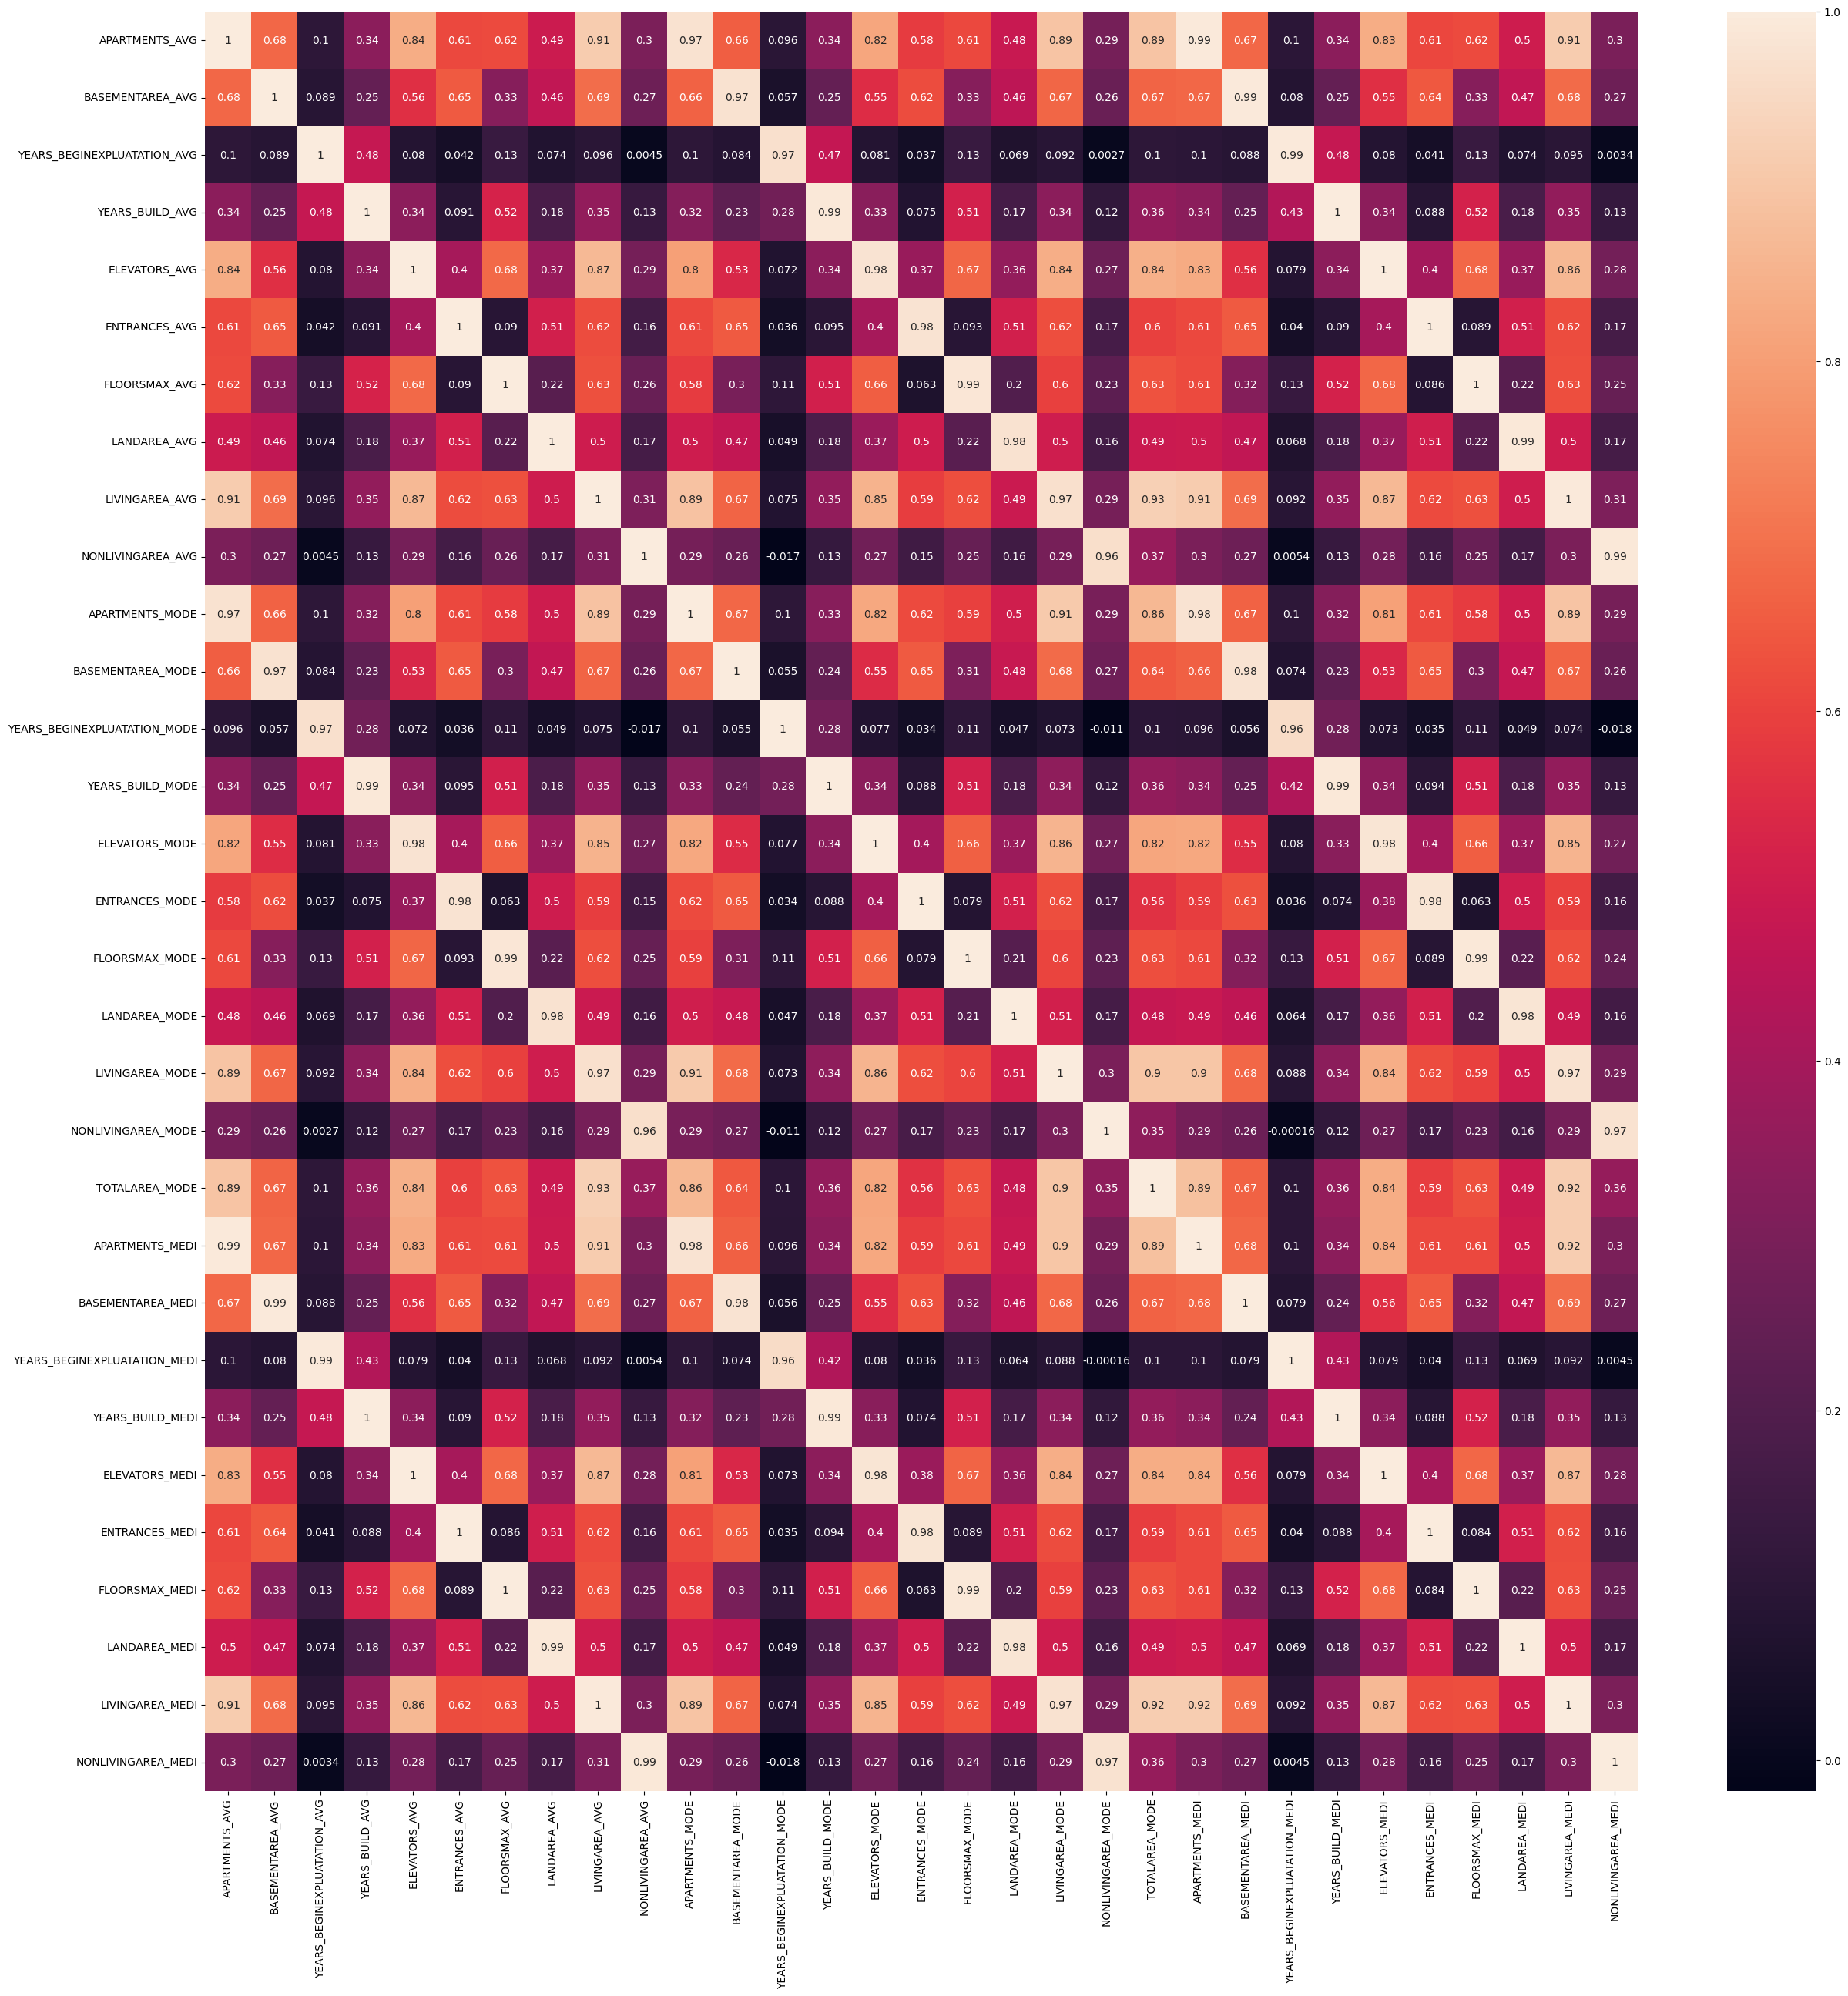

In [403]:
correlation=train_data[apartment_col].corr()
plt.figure(figsize=[30,30])
sn.heatmap(correlation, annot=True)
plt.show()

##keeping only APARTMENT_AVG column:(20 columns are drop)

In [404]:
drop_col=['APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE',
       'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI']

In [405]:
#train
train_data.drop(columns=drop_col,axis=1,inplace=True)
#test
test_data.drop(columns=drop_col,axis=1,inplace=True)

In [406]:
train_data.shape

(184506, 85)

In [407]:
test_data.shape

(123005, 84)

In [408]:
mode_col=['APARTMENTS_AVG','BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAREA_AVG']

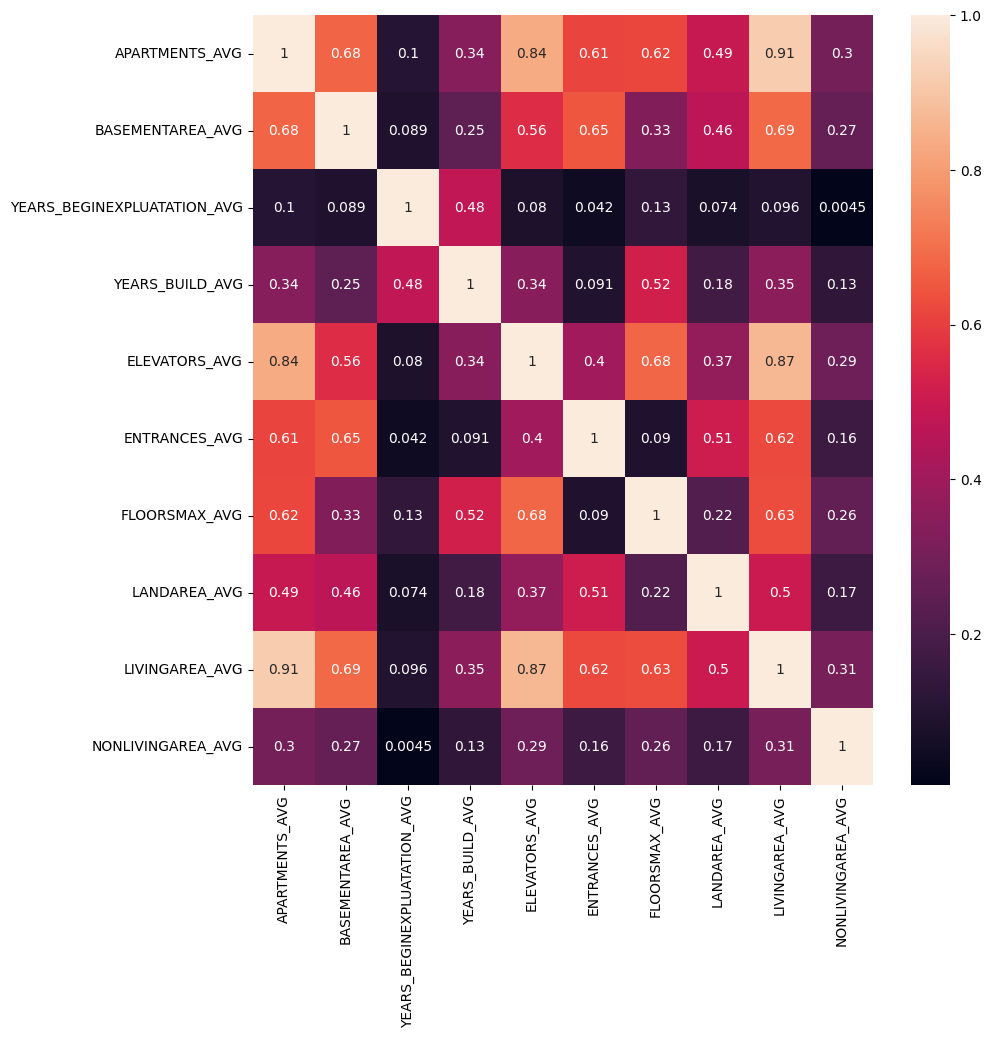

In [409]:
correlation=train_data[mode_col].corr()
plt.figure(figsize=[10,10])
sn.heatmap(correlation, annot=True)
plt.show()

#Flag document columns

In [410]:
flag_col=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [411]:
for i in flag_col:
  print(train_data[i].value_counts())

0    184499
1         7
Name: FLAG_DOCUMENT_2, dtype: int64
1    130702
0     53804
Name: FLAG_DOCUMENT_3, dtype: int64
0    184489
1        17
Name: FLAG_DOCUMENT_4, dtype: int64
0    181630
1      2876
Name: FLAG_DOCUMENT_5, dtype: int64
0    168207
1     16299
Name: FLAG_DOCUMENT_6, dtype: int64
0    184473
1        33
Name: FLAG_DOCUMENT_7, dtype: int64
0    169319
1     15187
Name: FLAG_DOCUMENT_8, dtype: int64
0    183798
1       708
Name: FLAG_DOCUMENT_9, dtype: int64
0    184502
1         4
Name: FLAG_DOCUMENT_10, dtype: int64
0    183763
1       743
Name: FLAG_DOCUMENT_11, dtype: int64
0    184506
Name: FLAG_DOCUMENT_12, dtype: int64
0    183817
1       689
Name: FLAG_DOCUMENT_13, dtype: int64
0    183967
1       539
Name: FLAG_DOCUMENT_14, dtype: int64
0    184267
1       239
Name: FLAG_DOCUMENT_15, dtype: int64
0    182721
1      1785
Name: FLAG_DOCUMENT_16, dtype: int64
0    184456
1        50
Name: FLAG_DOCUMENT_17, dtype: int64
0    183054
1      1452
Name: FLAG_DOCUMENT_

##Drop document_12 (NO applicant submit it)

In [412]:
#train
train_data.drop('FLAG_DOCUMENT_12',axis=1,inplace=True)
#test
test_data.drop('FLAG_DOCUMENT_12',axis=1,inplace=True)

In [413]:
print(train_data.shape)
print(test_data.shape)

(184506, 84)
(123005, 83)


In [414]:
flag_col=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

#Drop flag_document having submission less than 1000

In [415]:
#train
for i in flag_col:
  if train_data[i].value_counts()[1]<=1000:
    train_data.drop(i,axis=1,inplace=True)
#test
for i in flag_col:
  if test_data[i].value_counts()[1]<=1000:
    test_data.drop(i,axis=1,inplace=True)

In [416]:
print(train_data.shape)
print(test_data.shape)

(184506, 71)
(123005, 70)


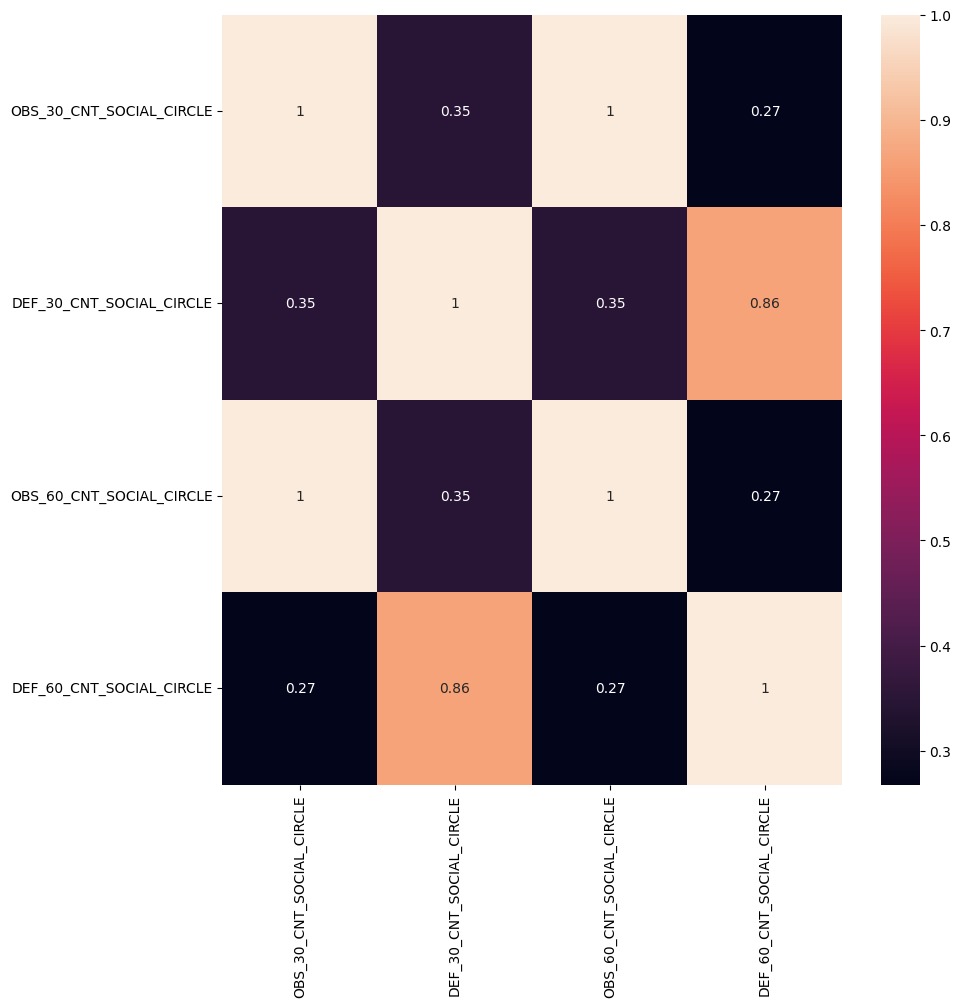

In [417]:
correlation=train_data[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].corr()
plt.figure(figsize=[10,10])
sn.heatmap(correlation, annot=True)
plt.show()

##Drop OBS_60_CNT_SOCIAL_CIRCLE having high relation with OBS_30_CNT_SOCIAL_CIRCLE

In [418]:
#train
train_data.drop(['OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)
#test
test_data.drop(['OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

In [419]:
##drop SK_ID_CURR column having no use
train_data.drop('SK_ID_CURR',axis=1,inplace=True)
test_data.drop('SK_ID_CURR',axis=1,inplace=True)

In [420]:
print(train_data.shape)
print(test_data.shape)

(184506, 68)
(123005, 67)


#split columns into categorical and non-categorical

In [421]:
categorical=[]
non_categorical=[]
for i in train_data.columns:
  if train_data[i].dtype=='object':
    categorical.append(i)
  else:
    non_categorical.append(i)

#Outliers Detection

In [422]:
train_data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
count,184506.000000,1.845060e+05,1.845060e+05,184500.000000,1.843390e+05,184506.000000,184506.000000,184506.000000,184506.00000,184506.000000,62873.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184505.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,80432.000000,184093.000000,147850.000000,90931.000000,76531.000000,94606.000000,61749.000000,86186.000000,91699.000000,92780.000000,74963.000000,91972.000000,82718.000000,183867.000000,183867.000000,184505.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,184506.000000,159508.000000,159508.000000,159508.000000,159508.000000,159508.000000,159508.000000,184506.000000
mean,0.416463,1.689985e+05,5.992854e+05,27114.455805,5.386926e+05,0.020868,-16036.718307,63838.583271,-4984.89506,-2994.113948,12.049115,0.999995,0.819849,0.199115,0.998043,0.281611,0.056638,2.152706,2.051787,2.031332,12.062963,0.015176,0.051299,0.041175,0.078778,0.230323,0.179257,0.502568,0.514616,0.510894,0.117193,0.088303,0.977795,0.752196,0.078558,0.149578,0.225968,0.066468,0.107146,0.028265,1.426101,0.144311,-961.984591,0.708389,0.015588,0.088339,0.082312,0.009674,0.007870,0.006338,0.007335,0.034400,0.267247,0.266770,1.897504,0.080729
std,0.719614,2.942453e+05,4.021982e+05,14468.652072,3.692263e+05,0.013818,4361.484692,141295.297588,3524.99741,1509.959416,11.930581,0.002328,0.384314,0.399336,0.044190,0.449786,0.231150,0.907545,0.508278,0.502096,3.263908,0.122252,0.220608,0.198695,0.269393,0.421041,0.383568,0.210675,0.190879,0.194894,0.107990,0.082494,0.058365,0.114103,0.133800,0.100177,0.144819,0.081644,0.110432,0.069137,2.456428,0.452266,827.403575,0.454505,0.123874,0.283787,0.274840,0.097882,0.088362,0.083743,0.114671,0.204187,0.919465,0.894563,1.864439,0.272419
min,0.000000,2.610000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25201.000000,-17912.000000,-23416.00000,-6383.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,0.000001,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16555.500000,2.385000e+05,0.010006,-19677.000000,-2757.000000,-7486.00000,-4299.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.335184,0.392426,0.370650,0.057700,0.044200,0.976700,0.687200,0.000000,0.069000,0.166700,0.018700,0.045000,0.000000,0.000000,0.000000,-1569.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.48500

## Outliers possible in CNT_CHILDREN and DAYS_EMPLOYED

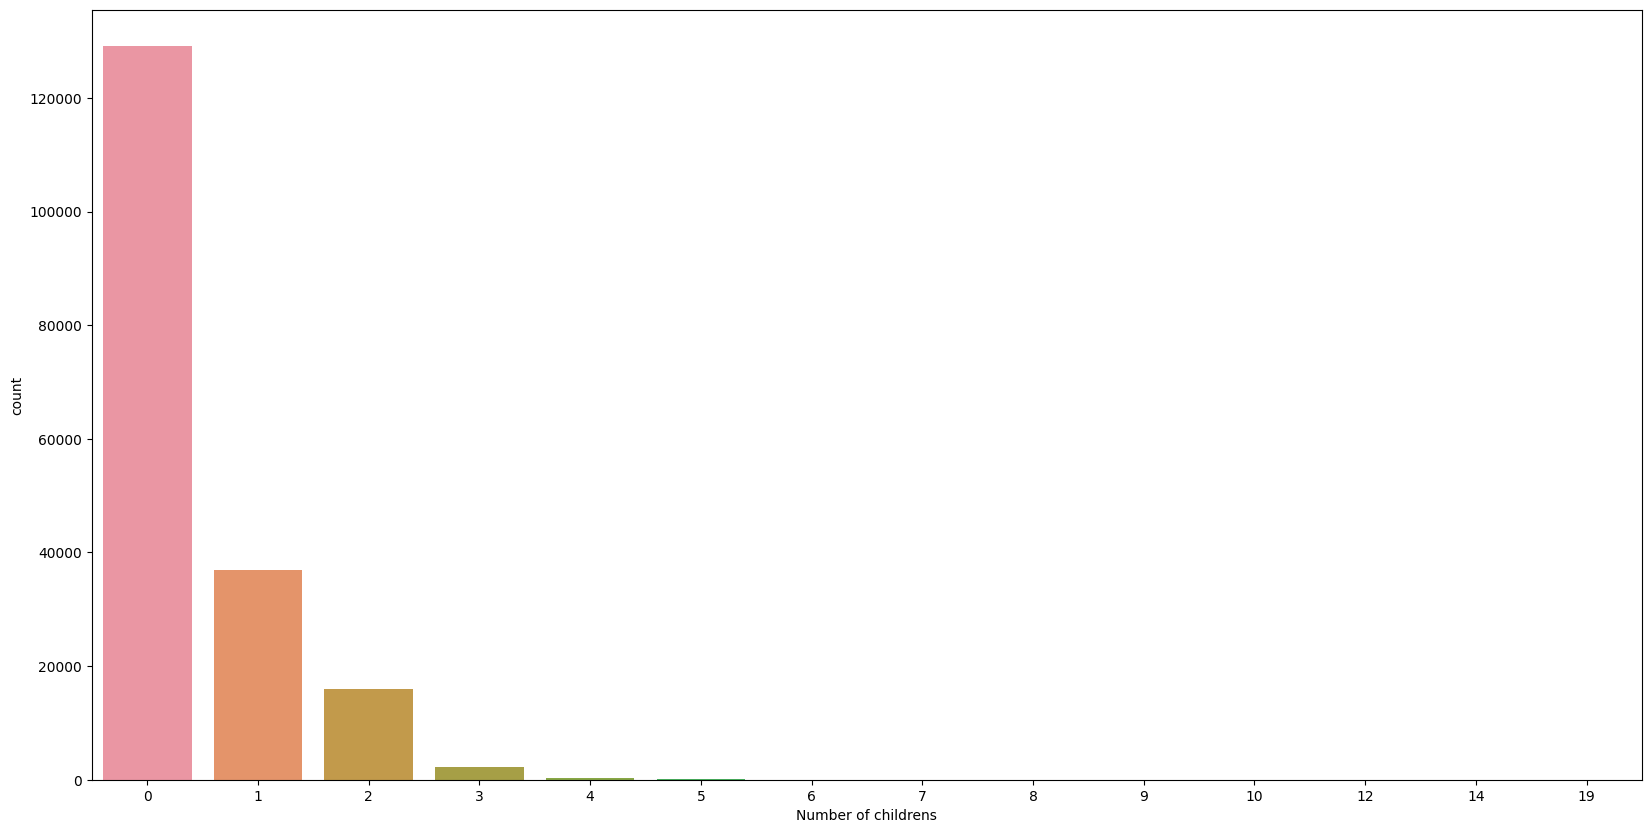

In [423]:
##Not normally distributed so we cannot use Z-score
plt.figure(figsize=(20,10))
sn.countplot(x='CNT_CHILDREN',data=train_data)
plt.xlabel('Number of childrens')
plt.show()

In [424]:
train_data['CNT_CHILDREN'].describe()

count    184506.000000
mean          0.416463
std           0.719614
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

<AxesSubplot: >

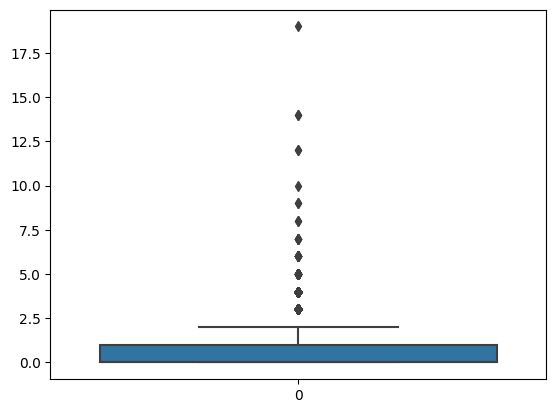

In [425]:
sn.boxplot(train_data['CNT_CHILDREN'])

In [426]:
train_data['CNT_CHILDREN'].value_counts()

0     129082
1      36984
2      15938
3       2190
4        237
5         48
6         12
7          5
14         2
12         2
8          2
9          2
10         1
19         1
Name: CNT_CHILDREN, dtype: int64

In [427]:
#train
drop_index_CNT_CHILDREN=train_data[train_data['CNT_CHILDREN']>5].index
train_data.drop(drop_index_CNT_CHILDREN,inplace=True)

/tmp/ipykernel_148583/4168472365.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train_data['DAYS_EMPLOYED']/365)


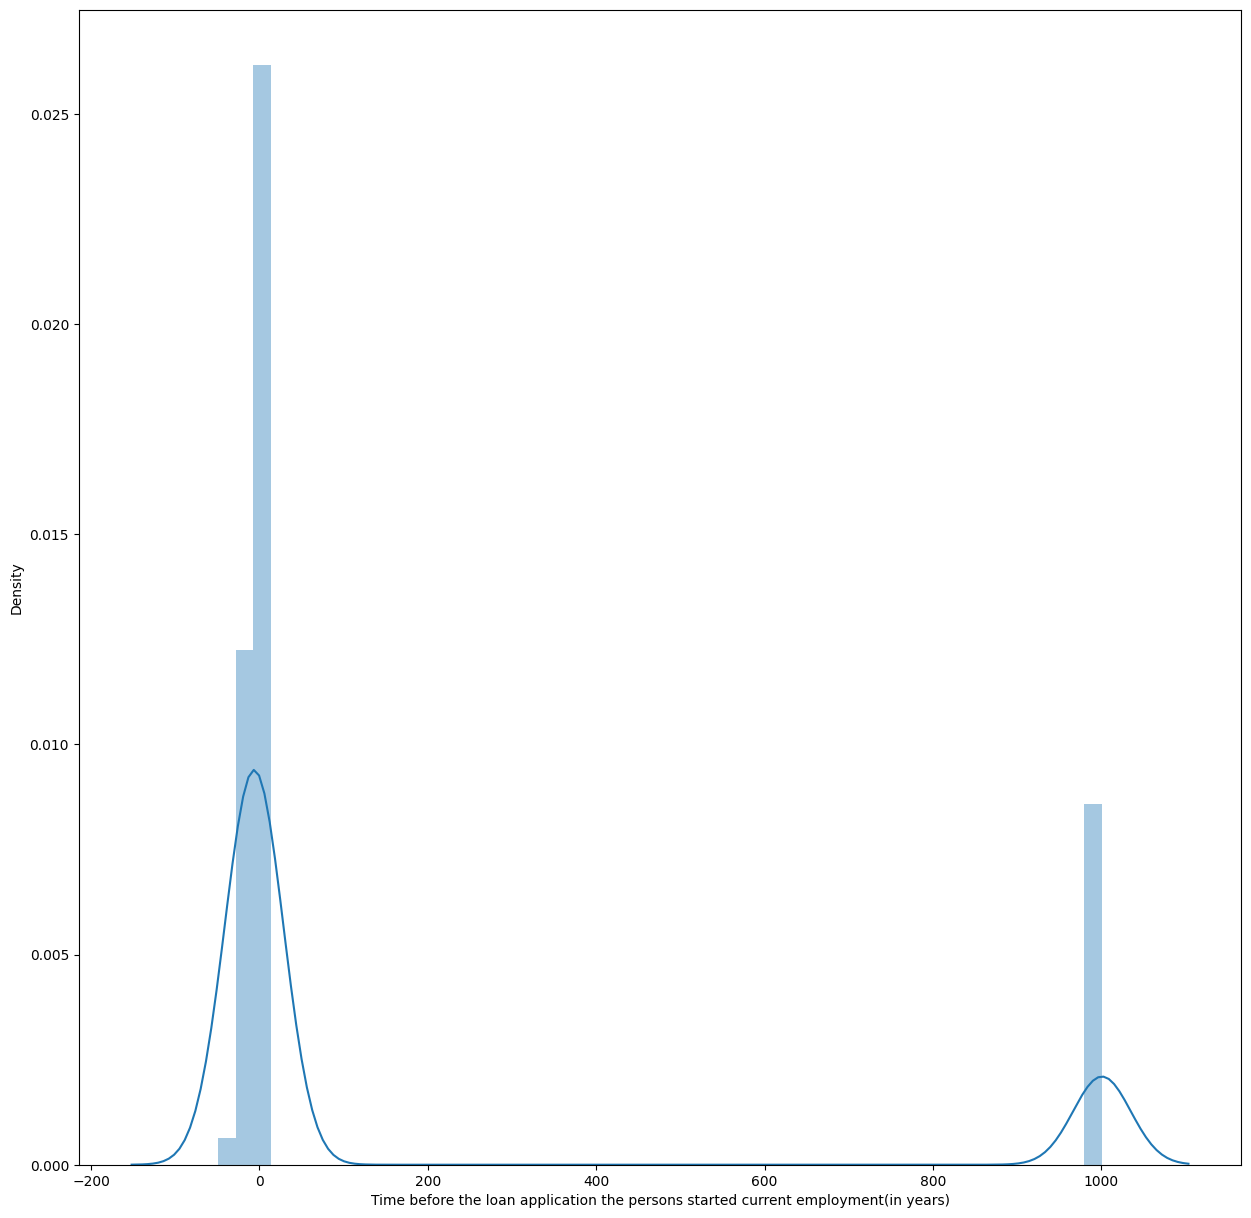

In [428]:
##Not normally distributed so we cannot use Z-score
plt.figure(figsize=(15,15))
sn.distplot(train_data['DAYS_EMPLOYED']/365)
plt.xlabel("Time before the loan application the persons started current employment(in years)")
plt.show()

#who are these peoples getting employment 1000year before applying loan
####replace it with Nan

In [429]:
#train
train_data['DAYS_EMPLOYED'] =train_data['DAYS_EMPLOYED'].replace(365243.000000,np.nan)

#test
test_data['DAYS_EMPLOYED'] =test_data['DAYS_EMPLOYED'].replace(365243.000000,np.nan)

In [430]:
##converting relative Dates into number of years
date_col=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for i in date_col:
    train_data[i]=train_data[i]/-365

for i in date_col:
    test_data[i]=test_data[i]/-365

In [431]:
train_data.head(10)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,Cash loans,F,N,Y,1,67500.0,227520.0,11065.5,180000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018634,47.150685,2.120548,15.287671,2.068493,NaN,1,1,1,1,0,0,Sales staff,3.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Business Entity Type 3,NaN,0.264354,NaN,0.0124,NaN,0.9444,NaN,0.00,0.0345,0.0417,NaN,0.0095,0.0000,0.0,0.0,-150.0,1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,Cash loans,M,Y,Y,1,247500.0,1882372.5,65560.5,1719000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.018850,51.068493,0.263014,15.646575,5.958904,25.0,1,1,0,1,0,1,Managers,3.0,2,2,TUESDAY,10,0,0,0,0,1,1,Business Entity Type 3,0.581064,0.172251,0.686382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-444.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0,0
2,Cash loans,M,Y,Y,1,180000.0,101880.0,10827.0,90000.0,"Spouse, partner",Working,Higher education,Married,House / apartment,0.022625,40.134247,16.794521,4.865753,12.515068,9.0,1,1,1,1,0,0,Laborers,3.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 4,NaN,0.636218,0.540654,0.1979,0.1169,0.9841,0.7824,0.16,0.0690,0.4583,0.1587,0.1033,0.1880,1.0,0.0,0.0,1,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,0
3,Cash loans,M,N,N,0,81000.0,405000.0,20677.5,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,With parents,0.035792,34.964384,16.139726,17.616438,12.652055,NaN,1,1,1,1,1,0,NaN,1.0,2,2,WEDNESDAY,18,0,0,0,0,1,1,Other,NaN,0.599924,0.337673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0,-1671.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
4,Cash loans,F,N,Y,0,157500.0,888840.0,29506.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.018801,44.736986,0.945205,3.871233,12.668493,NaN,1,1,0,1,0,0,Sales staff,2.0,2,2,TUESDAY,9,0,0,0,0,1,1,Business Entity Type 3,0.476511,0.312779,0.819318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,-28.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
5,Cash loans,M,Y,Y,0,202500.0,1350000.0,64948.5,1350000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,With parents,0.018209,24.087671,2.717808,12.257534,3.989041,9.0,1,1,0,1,0,0,Laborers,1.0,3,3,TUESDAY,14,0,0,0,0,0,0,Self-employed,0.149971,0.482853,NaN,0.2557,0.1886,0.9826,NaN,0.28,0.2414,0.3333,0.1552,0.2551,0.0176,5.0,0.0,-697.0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
6,Cash loans,F,N,Y,0,180000.0,1113840.0,44302.5,900000.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.020713,61.635616,NaN,23.178082,12.975342,NaN,1,0,0,1,0,0,NaN,2.0,3,1,SUNDAY,10,0,0,0,0,0,0,XNA,NaN,0.541764,0.806149,0.1227,0.1116,0.9762,NaN,0.00,0.2069,0.1667,0.0487,0.0943,0.0032,5.0,0.0,-721.0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0,0
7,Cash loans,F,N,Y,0,103500.0,45000.0,4738.5,45000.0,Family,Commercial assoc

/tmp/ipykernel_148583/717351135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train_data['DAYS_LAST_PHONE_CHANGE']/-365)


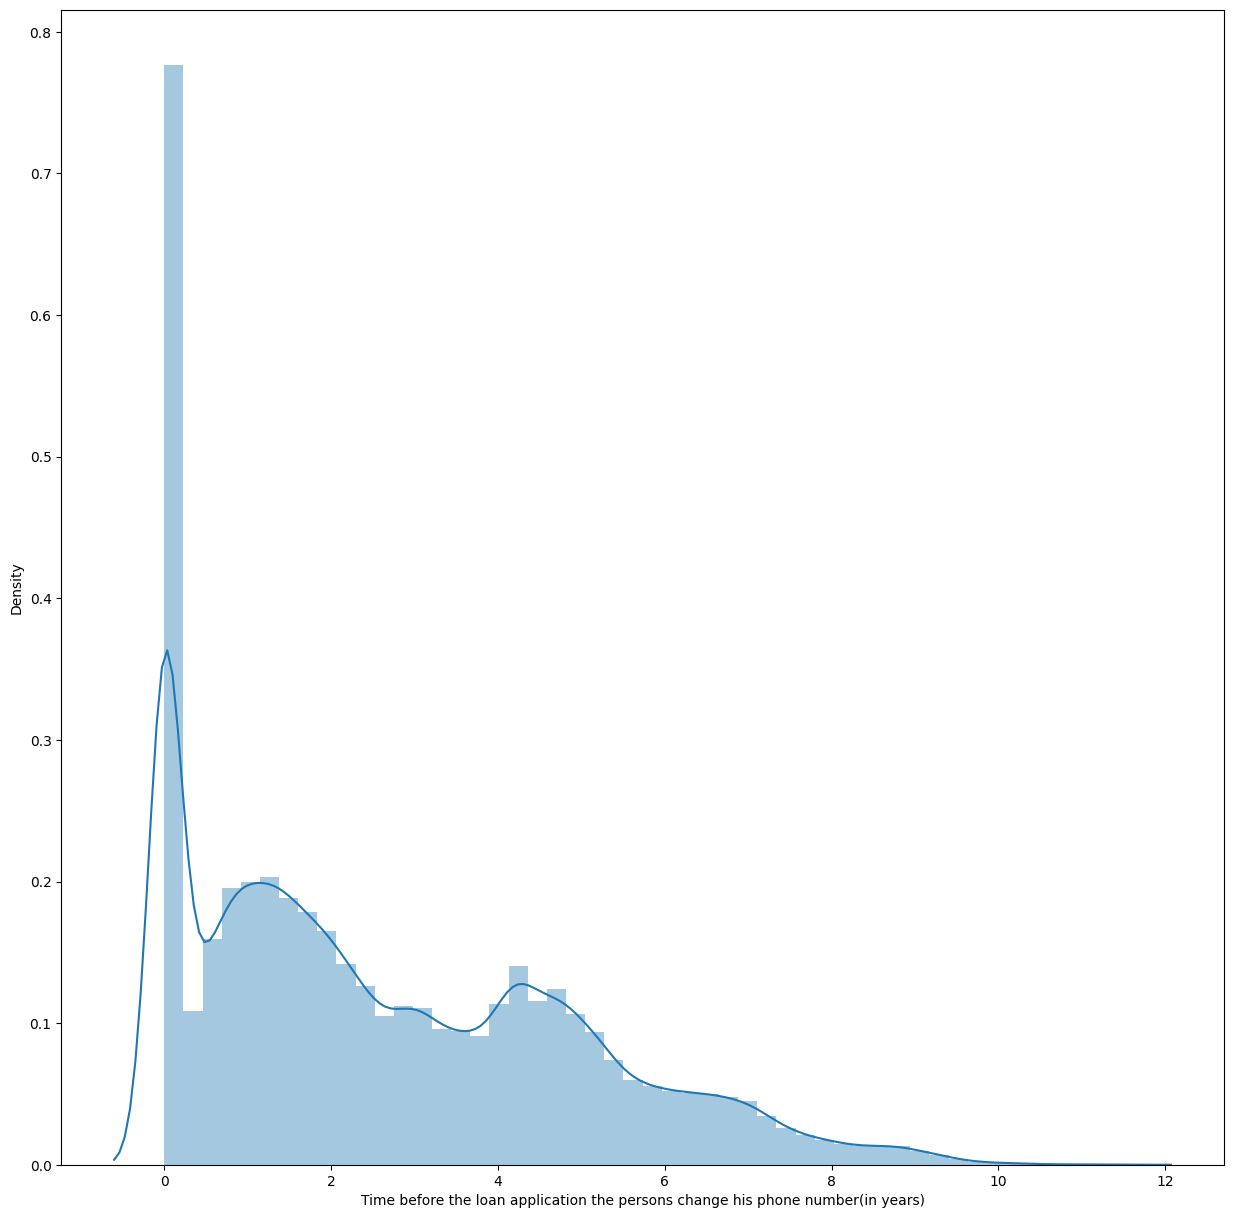

In [432]:
plt.figure(figsize=(15,15))
sn.distplot(train_data['DAYS_LAST_PHONE_CHANGE']/-365)
plt.xlabel("Time before the loan application the persons change his phone number(in years)")
plt.show()

In [433]:
train_data[train_data['DAYS_LAST_PHONE_CHANGE']/-365<0.5][['TARGET']].value_counts()

TARGET
0         35060
1          3579
dtype: int64

In [434]:
train_data.shape

(184479, 68)

In [435]:
test_data.shape

(123005, 67)

In [436]:
# ## replace NaN with 0 in feature (OWN_CAR_AGE)
#train
train_data['OWN_CAR_AGE'] =train_data['OWN_CAR_AGE'].replace(np.nan,0)
#test
test_data['OWN_CAR_AGE'] =test_data['OWN_CAR_AGE'].replace(np.nan,0)

In [437]:
#create other categeory for NULL data in NAME_TYPE_SUITE
train_data['NAME_TYPE_SUITE'] =train_data['NAME_TYPE_SUITE'].replace(np.nan, 'other')
test_data['NAME_TYPE_SUITE'] =test_data['NAME_TYPE_SUITE'].replace(np.nan, 'other')

In [438]:
#train
target_0_index=train_data.loc[(train_data['OCCUPATION_TYPE'].isna()) & (train_data['TARGET']==0)].index
target_1_index=train_data.loc[(train_data['OCCUPATION_TYPE'].isna()) & (train_data['TARGET']==1)].index
train_data['OCCUPATION_TYPE'][target_0_index] ='Accountants'
train_data['OCCUPATION_TYPE'][target_1_index] ='Low-skill Laborers'

#test
test_index=test_data.loc[test_data['OCCUPATION_TYPE'].isna()].index
test_data['OCCUPATION_TYPE'][test_index] ='Accountants'

/tmp/ipykernel_148583/1940947063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['OCCUPATION_TYPE'][target_0_index] ='Accountants'
/tmp/ipykernel_148583/1940947063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['OCCUPATION_TYPE'][target_1_index] ='Low-skill Laborers'
/tmp/ipykernel_148583/1940947063.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['OCCUPATION_TYPE'][test_index] ='Accountants'

In [439]:
test_data.shape

(123005, 67)

In [440]:
def impute_nan(df,variable,median):
  df[variable]=df[variable].fillna(median)
#Train
for i in train_data.columns:
  if train_data[i].isna().sum()!=0 and train_data[i].dtype!='object':
    median=train_data[i].median()
    impute_nan(train_data,i,median)

#Test
for i in test_data.columns:
  if test_data[i].isna().sum()!=0 and test_data[i].dtype!='object':
    median=test_data[i].median()
    impute_nan(test_data,i,median)


In [441]:
categorical_feats= [f for f in train_data.columns if train_data[f].dtype == 'object']

In [442]:
#train
for cat_feats in categorical_feats:
  train_data=pd.get_dummies(data=train_data, columns=[cat_feats],prefix_sep='_')

#test
for cat_feats in categorical_feats:
  test_data=pd.get_dummies(data=test_data, columns=[cat_feats],prefix_sep='_')

$$Under\ Sampling$$

In [443]:
# min_class_len=len(train_data[train_data['TARGET']==1])
# print(min_class_len)

In [444]:
# maj_class_indices=train_data[train_data['TARGET']==0].index
# print(maj_class_indices)

In [445]:
# random_maj_indices=np.random.choice(maj_class_indices, min_class_len, replace= False)
# print(len(random_maj_indices))

In [446]:
# min_class_indices=train_data[train_data['TARGET']==1].index
# print(min_class_indices)

In [447]:
# under_sample_indices=np.concatenate([min_class_indices,random_maj_indices])
# train_data=train_data.loc[under_sample_indices]

In [448]:
# sn.countplot(x='TARGET', data=train_data)

In [449]:
# def overSampleDataSet(dataSet,output_feature,minority_class):
#   min_class_indices=dataSet[dataSet[output_feature]==minority_class].index
#   maj_class_indices=dataSet[dataSet[output_feature]==(1-minority_class)].index
#   min_class_len=len(min_class_indices)
#   maj_class_len=len(maj_class_indices)
#   random_min_class_indices=np.random.choice(min_class_indices,(maj_class_len-min_class_len))
#   new_min_class_indices=np.concatenate([min_class_indices,random_min_class_indices])
#   indices=np.concatenate([maj_class_indices,new_min_class_indices])
#   over_sampled_dataset=dataSet.loc[indices]
#   return over_sampled_dataset

# train_data=overSampleDataSet(train_data,"TARGET",1)

In [497]:
#Train
X_train=train_data.drop('TARGET',axis=1).values
Y_train=train_data['TARGET']
#test
X_test_kaggle=test_data.values

#X_train_data, X_test, Y_train_data, Y_test = train_test_split(X_train,Y_train, test_size=0.2, random_state=42)

In [498]:
###undersample
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter
# print('Original dataset shape %s' % Counter(Y_train))
# undersampler= RandomUnderSampler(random_state=42)
# X_train,Y_train=undersampler.fit_resample(X_train,Y_train)
# print('Dataset shape after undersampling %s' % Counter(Y_train))

#oversample
from imblearn.over_sampling import SMOTE
print('Dataset shape %s' % Counter(Y_train))
oversampler= SMOTETomek(random_state=42)
X_train,Y_train=oversampler.fit_resample(X_train,Y_train)
print('Dataset shape after oversampling %s' % Counter(Y_train))

#feature Scaling
# scaler = preprocessing.MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# #X_test = scaler.fit_transform(X_test)
# X_test_kaggle = scaler.fit_transform(X_test_kaggle)

#under sample {bootstrap=False,
#  max_depth=90,
#  min_samples_leaf=15,
#  min_samples_split=2,
#  n_estimators=200}

#over sample
# {bootstrap=False,
#  max_depth=4,
#  min_samples_leaf=0.1,
#  min_samples_split=0.4,
#  n_estimators=100}

#model
model= RandomForestClassifier(
 max_depth=4,
 min_samples_leaf=0.1,
 min_samples_split=0.4,
 n_estimators=100)
#Define pipeline
pipeline = Pipeline([
    #('undersampler',undersampler),
    ('oversampler', oversampler),
    ('model', model)
])

pipeline.fit(X_train,Y_train)

#prediction of default model(Random_forest)
# Y_pred_train=pipeline.predict(X_train)

# f1=f1_score(Y_train,Y_pred_train,average='macro')
# print("f1 score model for train:{}".format(f1))
# Y_pred=pipeline.predict(X_test)
# f1=f1_score(Y_test,Y_pred,average='macro')
# print("f1 score model validation:{}".format(f1))

# confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
# cm_display.plot()
# plt.show()

Dataset shape Counter({0: 169590, 1: 14889})
Dataset shape after oversampling Counter({0: 161031, 1: 161031})


Pipeline(steps=[('oversampler', SMOTETomek(random_state=42)),
                ('model',
                 RandomForestClassifier(max_depth=4, min_samples_leaf=0.1,
                                        min_samples_split=0.4))])

In [458]:
# from sklearn.metrics import classification_report
# target_names = ['class 0', 'class 1']
# print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.74      0.84     33941
     class 1       0.21      0.79      0.33      2955

    accuracy                           0.75     36896
   macro avg       0.59      0.77      0.59     36896
weighted avg       0.91      0.75      0.80     36896



In [499]:
####submission#####
Y_pred_test=pipeline.predict(X_test_kaggle)
prediction_df['TARGET']=Y_pred_test

prediction_df['TARGET'].value_counts()

0    101778
1     21227
Name: TARGET, dtype: int64

In [500]:
prediction_df.head()

,SK_ID_CURR,TARGET
0,367294,0
1,439847,0
2,380562,0
3,407238,1
4,239910,0


In [461]:
# prediction_df.to_csv('final_over_sample_Random_forest_with_hyperparmeter3',index=False)

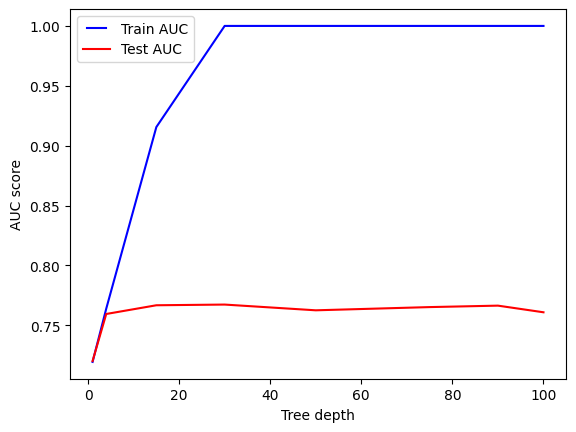

In [253]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc
max_depths = [1,4,15,30,50,75,90,100]
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, Y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label='Train AUC')
line2, = plt.plot(max_depths, test_results, "r", label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

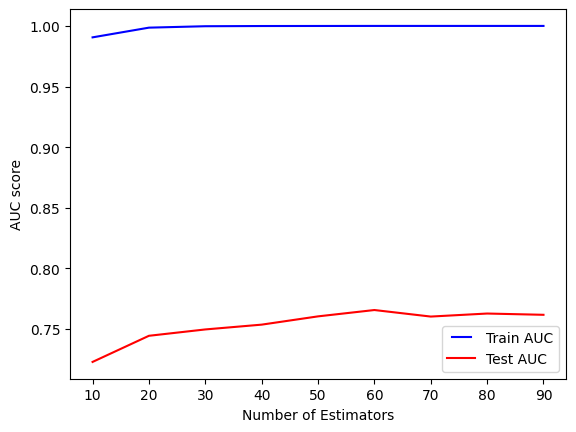

In [254]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc
n_estimators=range(10,100,10)
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, Y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label='Train AUC')
line2, = plt.plot(n_estimators, test_results, "r", label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Number of Estimators')
plt.show()

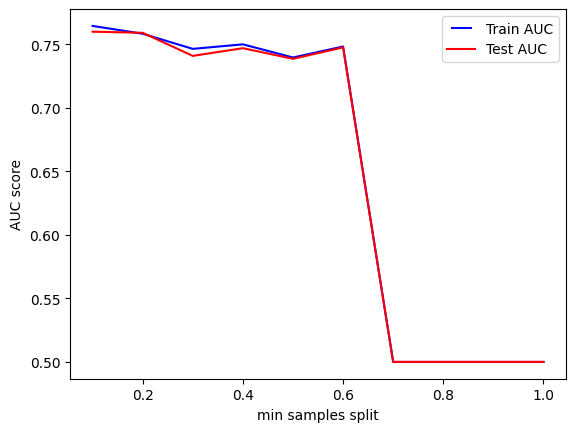

In [255]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, Y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

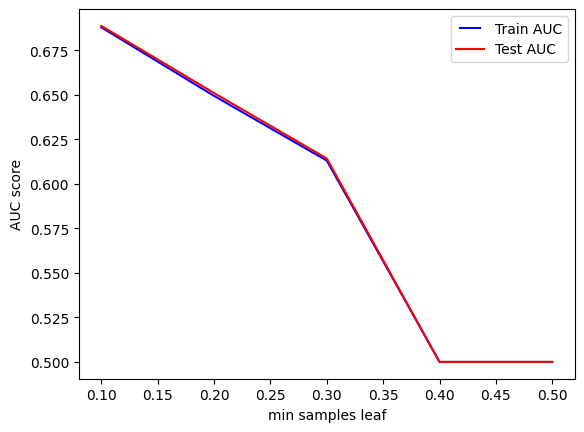

In [256]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, Y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [194]:
from sklearn.metrics import accuracy_score,roc_auc_score
print("ROC AUC score is: ",roc_auc_score(Y_test,Y_pred))

ROC AUC score is:  0.6217369536098049


In [142]:
####submission#####
Y_pred_test=pipeline.predict(X_test_kaggle)
prediction_df['TARGET']=Y_pred_test

In [143]:
prediction_df.head()

,SK_ID_CURR,TARGET
0,367294,0
1,439847,0
2,380562,0
3,407238,1
4,239910,0


In [144]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123005 entries, 0 to 123004
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   SK_ID_CURR  123005 non-null  int64
 1   TARGET      123005 non-null  int64
dtypes: int64(2)
memory usage: 1.9 MB


In [145]:
prediction_df['TARGET'].value_counts()

0    86303
1    36702
Name: TARGET, dtype: int64

In [146]:
prediction_df.to_csv('final_under_sample_Random_forest_with_hyperparmeter',index=False)

#Hyperparameter for Random-forest

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   2.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   1.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   3.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   4.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   4.4s
[CV] END

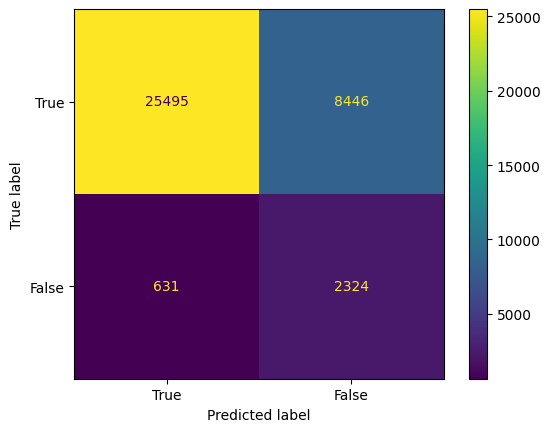

              precision    recall  f1-score   support

     class 0       0.98      0.75      0.85     33941
     class 1       0.22      0.79      0.34      2955

    accuracy                           0.75     36896
   macro avg       0.60      0.77      0.59     36896
weighted avg       0.91      0.75      0.81     36896

ROC AUC score is:  0.7688100197361492


In [71]:
# param={
# 'n_estimators':[10,20,100,200],
# 'max_depth' : range(10,100,20),
# 'min_samples_split' : [2,10,100],
# 'min_samples_leaf' : [1,5,15,50],
# 'bootstrap': [True, False]
# }

# cv=StratifiedKFold(n_splits=5)
# grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param,cv=cv,verbose=2,n_jobs=4)
# grid_result=grid.fit(X_train,Y_train)

# #best model
# model= RandomForestClassifier()
# model.set_params(**grid_result.best_params_)
# model.fit(X_train,Y_train)
# Y_pred=model.predict(X_test)
# Y_pred_train=model.predict(X_train)
# f1=f1_score(Y_test,Y_pred,average='macro')
# print("f1 score model for validation:{}".format(f1))

# f1=f1_score(Y_train,Y_pred_train,average='macro')
# print("f1 score model for train:{}".format(f1))

# confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
# cm_display.plot()
# plt.show()

# from sklearn.metrics import classification_report
# target_names = ['class 0', 'class 1']
# print(classification_report(Y_test, Y_pred, target_names=target_names))


# from sklearn.metrics import accuracy_score,roc_auc_score
# print("ROC AUC score is: ",roc_auc_score(Y_test,Y_pred))

In [72]:
# grid_result.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 200}

In [73]:
# df=pd.DataFrame(grid_result.cv_results_)

In [ ]:
# df

In [75]:
# ####submission#####
# Y_pred_test=model.predict(X_test_kaggle)
# prediction_df['TARGET']=Y_pred_test
# prediction_df.head()

/home/sohamdp/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,SK_ID_CURR,TARGET
0,367294,0
1,439847,0
2,380562,0
3,407238,1
4,239910,0


In [76]:
# prediction_df['TARGET'].value_counts()

0    89990
1    33015
Name: TARGET, dtype: int64

In [77]:
# prediction_df.to_csv('final_under_sample_Random_forest_with_hyperparmeter',index=False)